# Austin Pets Alive! and Maddie's Fund Parvo Research Treatment Analysis

This notebook contains Exploratory Data Analyses and Data Transformations performed on the Parvo Treatment dataset from Austin Pets Alive!. It is meant to serve as a starting point for further analysis and visualization with the intention of:
1. Communicating these results to other shelters so that they will begin treating animals with this disease rather than euthanizing them
2. Determining what, if any, further action should be taken by Austin Pets Alive! to optimize treatment of this disease
3. Determine a measure of severity for animals with Parvo
4. Classify animals according to whether or not the typical treatment (performed on all animals in this data set) is expected to work (it fails on ~10% of animals - these animals die from the disease despite treatment).

<div class="alert alert-info">
<h3>Quick Questions</h3><p>Throughout this notebook, you'll see Quick Questions which are meant to guide you in thinking about the data and the problem space. These questions are <b>NOT REQUIRED</b> and no additional benefit is received by teams who solve them. They are purely meant as a guide.</p>
</div>

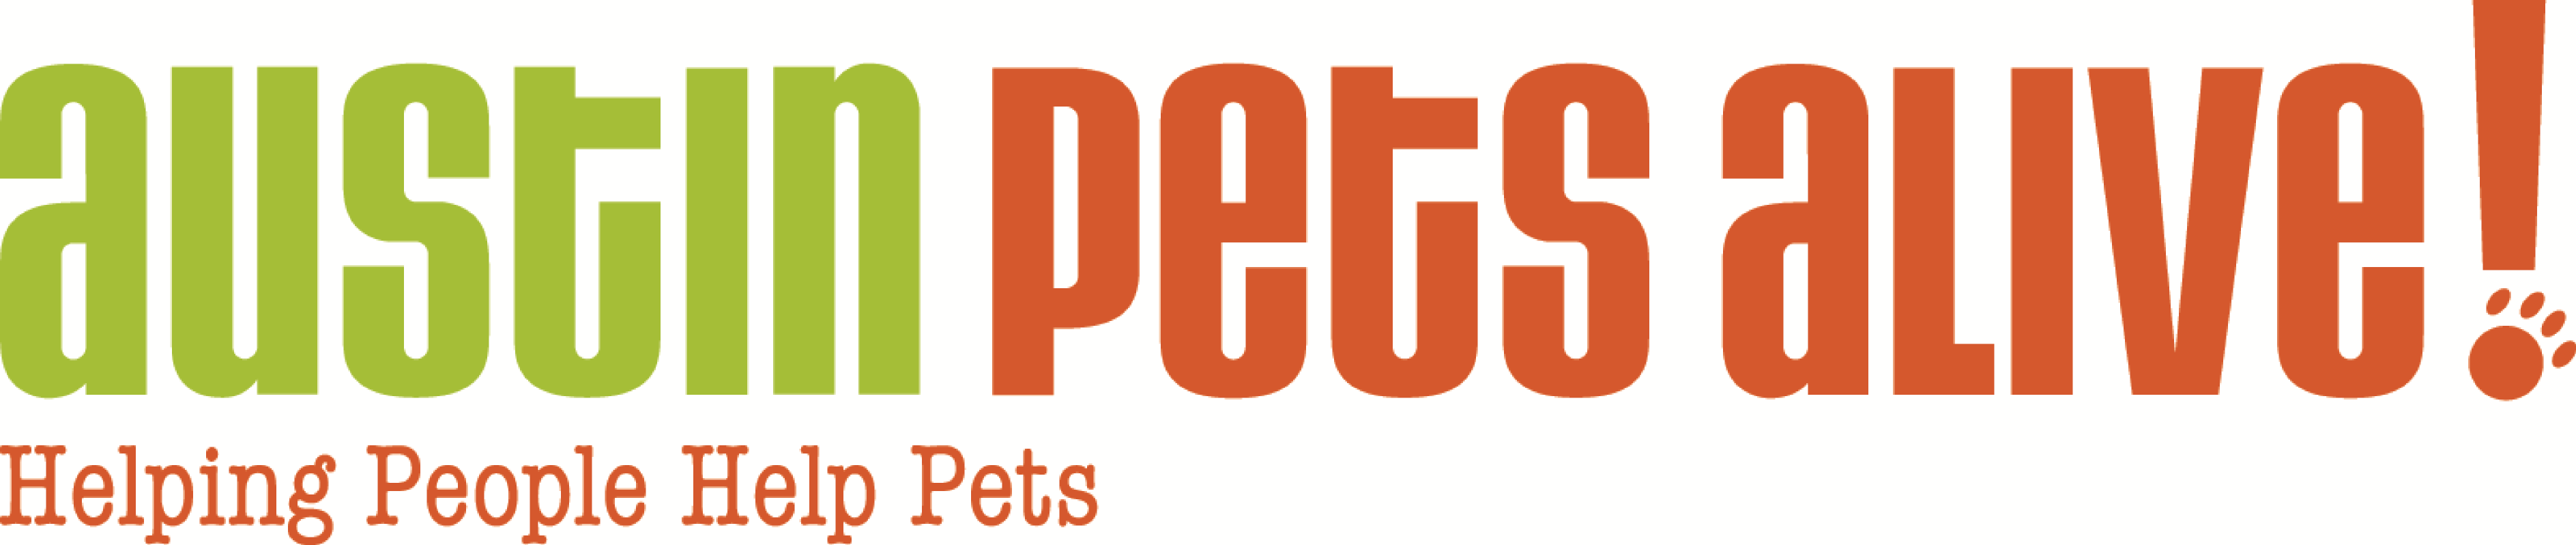

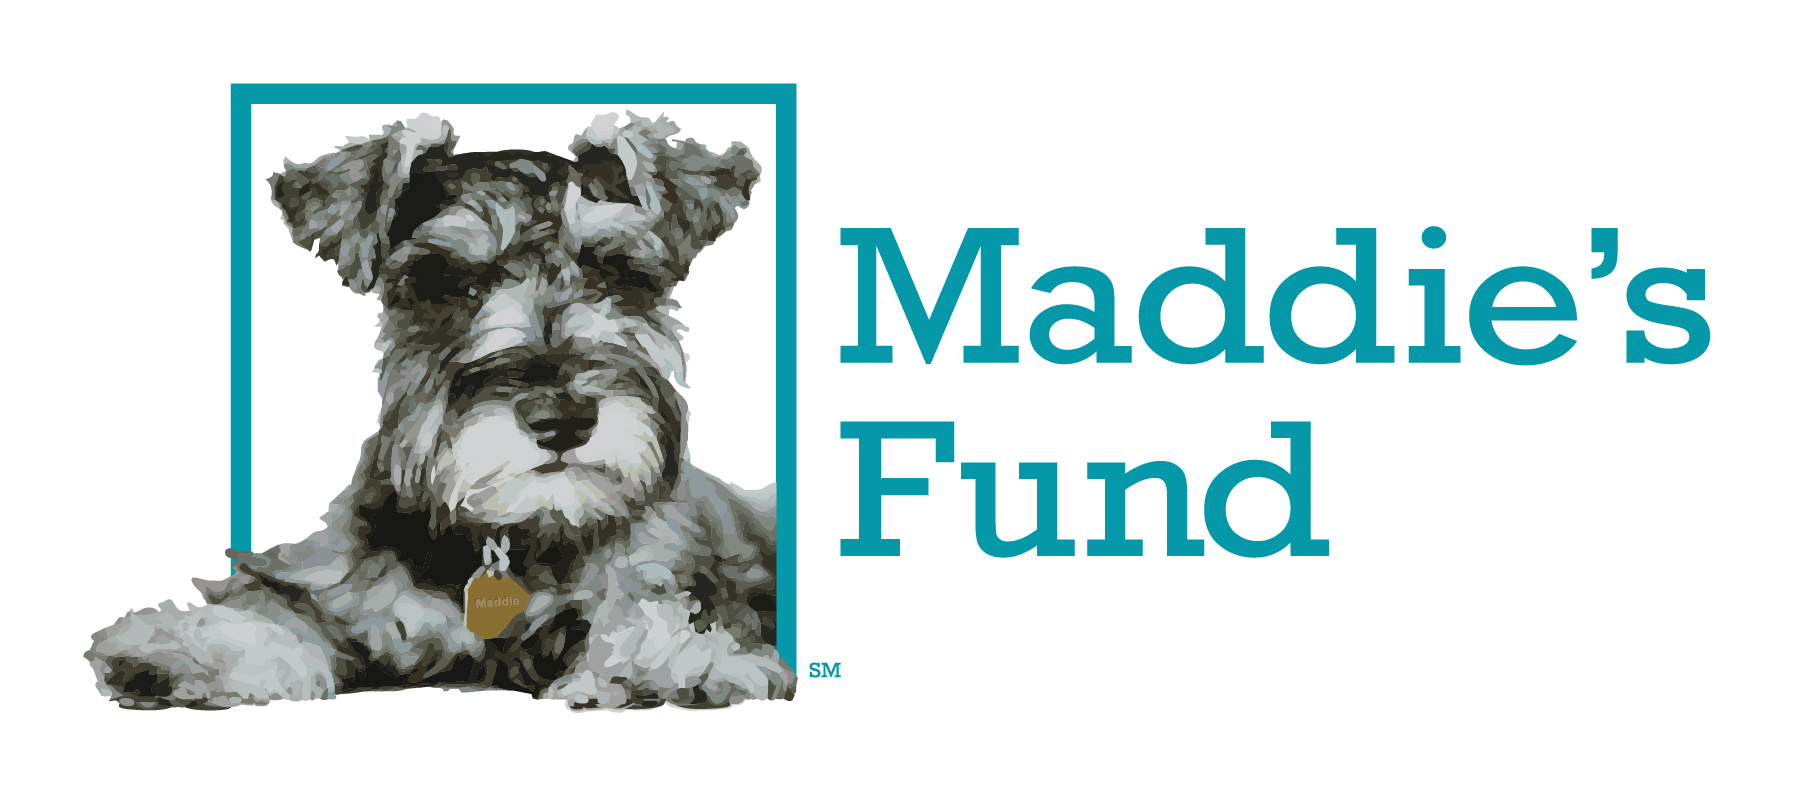

<img src="https://5107083.toastmastersclubs.org/imageuploads/5107083/walmart_technology_logo.png"/>

# 0. Library Versions

The Azure Notebooks interface defaults to an older version of Pandas where a bug is present in the read_excel function, so we need to upgrade our Pandas version first. Ensure that after you've run the upgrade, you see version 0.23.4 and 1.1.0 for pandas and xlrd, respectively.

In [2]:
# !pip install --upgrade pandas

  Using cached https://files.pythonhosted.org/packages/0e/67/def5bfaf4d3324fdb89048889ec523c0903c5efab1a64c8dbe0ac8eec13c/pandas-0.23.4-cp36-cp36m-win_amd64.whl


Could not install packages due to an EnvironmentError: [WinError 5] 拒绝访问。: 'f:\\anaconda\\Lib\\site-packages\\pandas\\io\\msgpack\\_packer.cp36-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



In [1]:
import pandas as pd
import xlrd

# print('pandas={0}'.format(pd.__version__))
# print('xlrd={0}'.format(xlrd.__VERSION__))

In [ ]:
## 0 idea

# 1. Data Ingestion

This section contains all the necessary data ingestion code which allows for easier Exploratory Data Analysis later in the file.

## 1.1 Data Importing

The data is contained within several sheets within the *Parvo Data.xlsx* Excel file, but the critical sheets are *Treatment Data* and *Parvo Admission Data*. We import these here and observe that the data was parsed correctly.

In [3]:
import os
import pandas as pd

data_directory = os.path.join('.')
data_filename = r'Parvo Data.xlsx'

data = pd.read_excel(os.path.join(data_directory, data_filename), sheet_name='Treatment Data')#this is all those data 
outcomes_data = pd.read_excel(os.path.join(data_directory, data_filename), sheet_name='Parvo Admission Data')

### 1.1.1  Frist Glance in Data 
somethings that you need to know first:
1. all of the dogs are diagnosed with CP
2. There are one or more than 10 records for each dog


In [6]:
print(data.info())

print(data.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9406 entries, 0 to 9405
Data columns (total 42 columns):
Data Entry Timestamp                                      9406 non-null datetime64[ns]
Treatment Date                                            9405 non-null datetime64[ns]
Treatment Shift                                           9403 non-null object
Dog A#                                                    9406 non-null int64
Dog Name                                                  9406 non-null object
Paw Temperature                                           9339 non-null object
Gum Color                                                 9340 non-null object
Attitude                                                  9366 non-null object
Co-morbidities noted TODAY                                257 non-null object
On Distemper Watch? (only mark on shift watch started)    171 non-null object
Baytril mL (Strength:100mg/mL) SQ ONLY                    3561 non-null float64
Polyflex m

### 1.1.2 Knowledge about Variables

#### 1.1.2.1 'Co-morbidities noted TODAY'

In [5]:
data['Co-morbidities noted TODAY'].value_counts()

URI                                                                     86
Ringworm                                                                80
Intestinal Parasites                                                    38
Distemper                                                               13
Abscess - Catheter                                                       9
URI, Ringworm                                                            8
Sarcoptic Mange                                                          6
Abscess - Baytril                                                        3
Oozing wound on left shelter                                             1
Nasal Discharge                                                          1
Swollen Face                                                             1
Broken Legs                                                              1
Heart murmur                                                             1
Demodex Mange            

#### idea: we should take usage of 'co-mobidities' var.
    1. one way is to turn it into binary variable. true means there are recorded co-morbidities.
    2. another way is that we can turn the morbidities into dummy variables according to the serve degree of specific co-morbidities.
    3. something is worth attention that if there are still existing co-morbidities when it is the second and more time we examinate same dog.

#### 1.1.2.2 Dog A'#'

Text(0.5,1,'How many treatments do dogs receive until checking out or deceased')

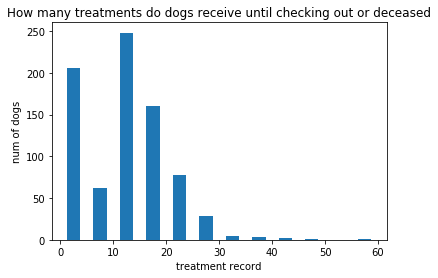

In [35]:
dogId_treatmentCount_index = data['Dog A#'].value_counts().index.tolist()#get index
dogId_treatmentCount = data['Dog A#'].value_counts().tolist()#get value

import matplotlib.pyplot as plt
bins = list(range(0, max(dogId_stat), 5))
plt.hist(dogId_treatmentCount, bins, histtype = 'bar', rwidth = 0.5)
plt.xlabel('treatment record')
plt.ylabel('num of dogs')
plt.title('How many treatments do dogs receive until checking out or deceased')

In [80]:
#get deceased var for each dog
df1 = outcomes_data[["Deceased", "Dog A#"]]
dict_id_treatCount = {}
for i in range(len(dogId_treatmentCount)):
    dict_id_treatCount[dogId_treatmentCount_index[i]] = dogId_treatmentCount[i]
tempList = []
for i in df1["Dog A#"]:
    tempList.append(dict_id_treatCount.get(i, -1))
df1['treatCount'] = pd.DataFrame.from_dict({'treatCount':tempList})

F:\anaconda\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [81]:
df1.head()

,Deceased,Dog A#,treatCount
0,No,45896,8
1,No,45958,13
2,No,56121,1
3,Yes,56227,1
4,No,46000,10


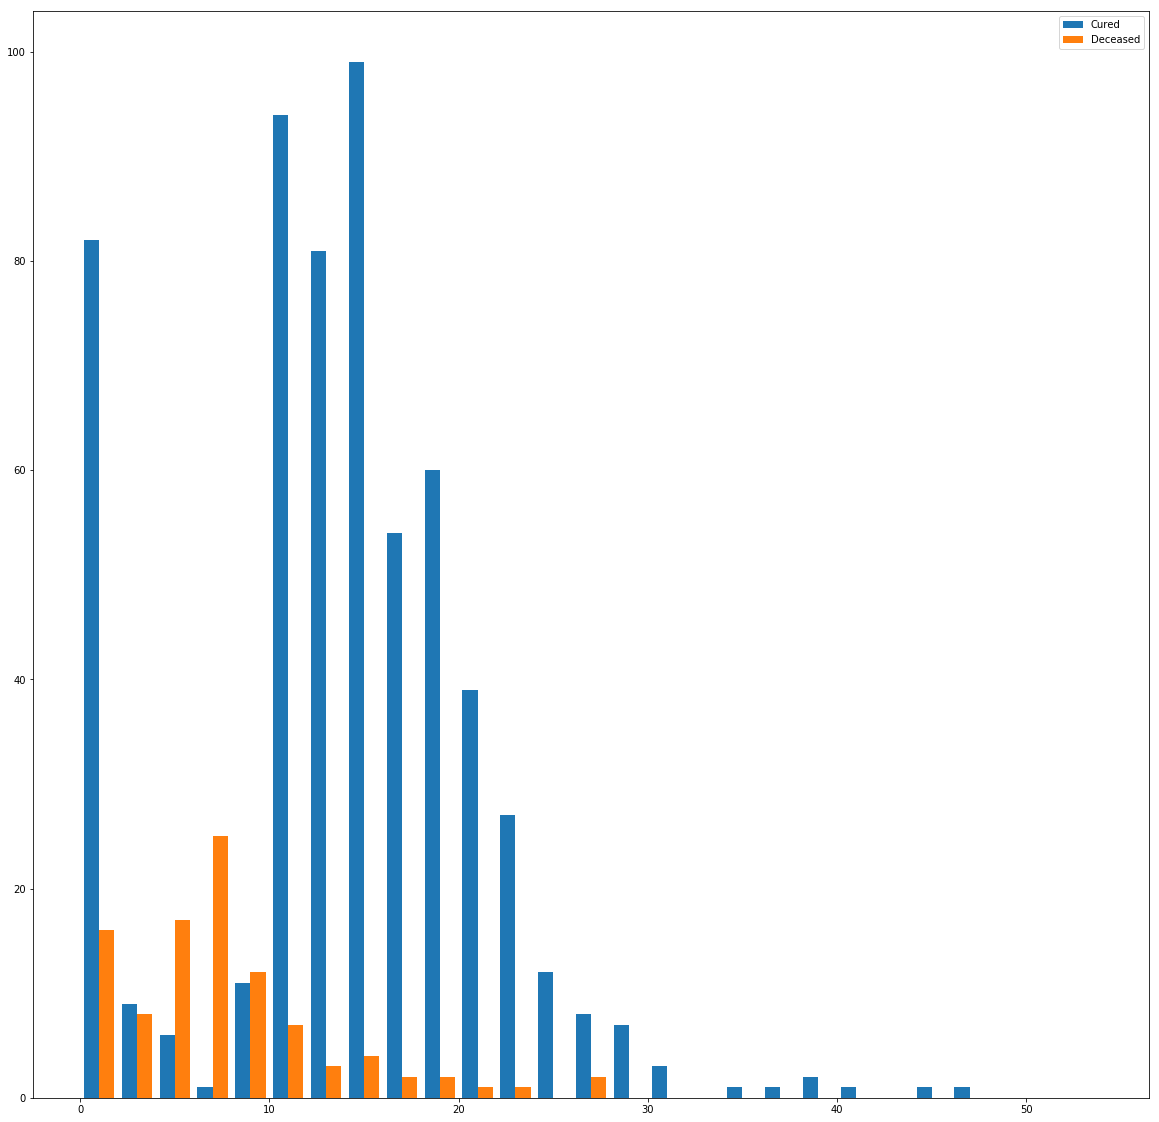

In [88]:
bins = list(range(0, max(df1['treatCount']), 2))
plt.hist([df1['treatCount'][df1['Deceased'] == "No"], df1['treatCount'][df1['Deceased'] == "Yes"]], bins, label = ["Cured", "Deceased"])
plt.legend(loc='upper right')
fig = plt.gcf()
fig.set_size_inches(20, 20)

#### this multi-bar plot shows that
    1. when treatment count is higher thatn 28, all the dogs are cured
    2. highest deceased rate happens in 7-8 treatments.
    3. When treatment count is larger than 7-8, less dogs are deceased.

In [47]:
len(dogId_treatmentCount)

796

### 1.1.3 Basic looking through in all the variable in data. 

In [ ]:
# take a look at correlations
%pylab inline

from pylab import rcParams
rcParams['figure.size'] = 8, 5
cols = 

## 1.2 Data Cleaning

There are several validations and cleaning steps we should do before analyzing the data. This includes validating that variables are within expected ranges and checking approximate distributions of different categorical variables to determine if they are reasonable.

First, we'll check our treatment date range to confirm it is valid.

In [5]:
import os
import pandas as pd

dates = pd.to_datetime(data['Treatment Date'], infer_datetime_format=True)
data['Treatment Date'] = dates
print(min(dates))
print(max(dates))

2017-01-03 00:00:00
2018-02-18 00:00:00


Next, we'll check some of our categorical columns that we'll use frequently. Note that this is just to get to know the data set and doesn't do anything to do data. If we notice values which we don't expect, we should clean the data set.

In [6]:
data['Treatment Shift'].value_counts()#??? what does this means

AM    4808
PM    4595
Name: Treatment Shift, dtype: int64

In [28]:
data['Attitude'].value_counts()

BAR (Normal)                         6064
QAR (mild to moderate depression)    3204
Lethargic (severe depression)          92
Comatose (Collapsed or Moribund)        6
Name: Attitude, dtype: int64

In [36]:
# cols = ['Packed Cell Volume % (not required each shift)',
#        'Blood Glucose (not required each shift)',
#        'Total Protein (not required each shift)',
#        'Temperature F (not required each shift)', 'Drinking Water',
#        'Cefazolin mL (1 gram/vial) IV ONLY',
#        'Hetastarch Rate mL/hr (6% Concentrate) IV ONLY',
#        'Oral Dextrose mL (50% concentrate)', 'Panacur mL (100mg/mL) ORAL ONLY',
#        'Strongid mL ORAL ONLY', 'Marquis Paste ORAL ONLY',
#        'Amount of SQ Fluids Administered mL', 'Anzemet mL (20mg/mL) IV ONLY',
#        'Famotidine mL (10mg/mL) ', 'Famotidine Route', 'Other Notes',
#        'Other Medications (Name/Strength/Dose/Route)',
#        'Amount of IV Fluids Administered mL/hr', 'Oral Nutrical mL',
#        'Hetastarch Dosage mL (6% Concentrate) IV ONLY', 'Unnamed: 41']
cols = ['Packed Cell Volume % (not required each shift)',
       'Blood Glucose (not required each shift)']

In [41]:
import seaborn as sns
%pylab inline
data.dtypes

Populating the interactive namespace from numpy and matplotlib


Data Entry Timestamp                                      datetime64[ns]
Treatment Date                                            datetime64[ns]
Treatment Shift                                                   object
Dog A#                                                             int64
Dog Name                                                          object
Paw Temperature                                                   object
Gum Color                                                         object
Attitude                                                          object
Co-morbidities noted TODAY                                        object
On Distemper Watch? (only mark on shift watch started)            object
Baytril mL (Strength:100mg/mL) SQ ONLY                           float64
Polyflex mL (Strength: 200mg/mL) SQ ONLY                         float64
Metoclopromide mL (Strength: 5mg/mL)                             float64
Metoclopromide Route                               

In [40]:
from pylab import rcParams
rcParams['figure.figsize'] = 8, 5
temp = data.fillna('')
sns_plot = sns.pairplot(data[cols])

IndexError: index -1 is out of bounds for axis 0 with size 0

In [8]:
number_of_treatments = len(data.groupby(['Dog A#', 'Treatment Date', 'Treatment Shift'])['Dog A#'].mean())
number_of_dogs = len(data.groupby(['Dog A#'])['Dog A#'].mean())
print('Each dog received an average of {0:0.2f} treatments.'.format(number_of_treatments/number_of_dogs))

Each dog received an average of 11.39 treatments.


In [20]:
len(data.groupby(['Dog A#', 'Treatment Date', 'Treatment Shift'])['Dog A#'].mean())

9063

In [9]:
outcomes_data['Deceased'].replace(['No', 'Yes'], [0, 1])
outcomes_data['Deceased'].value_counts()

No     609
Yes    101
Name: Deceased, dtype: int64

## 1.3 Meta-Data Generation

We'll be using several computed measures from the data set as well as converting aspects of the data set into numerical data (from categorical). Rather than do that scattered throughout the project, we'll do it all at once here.

### 1.3.1 Descriptions of the Data

We'll populate a few useful variables which describe the data here. This will let us reference these variables instead of writing column names over and over.

In [ ]:
medicine_columns = [
    'Baytril mL (Strength:100mg/mL) SQ ONLY',
    'Polyflex mL (Strength: 200mg/mL) SQ ONLY',
    'Metoclopromide mL (Strength: 5mg/mL)',
    'Cerenia mL ',
    'Cefazolin mL (1 gram/vial) IV ONLY',
    'Hetastarch Rate mL/hr (6% Concentrate) IV ONLY',
    'Oral Dextrose mL (50% concentrate)',
    'Panacur mL (100mg/mL) ORAL ONLY',
    'Strongid mL ORAL ONLY',
    'Marquis Paste ORAL ONLY',
    'Amount of SQ Fluids Administered mL',
    'Anzemet mL (20mg/mL) IV ONLY',
    'Famotidine mL (10mg/mL) ',
    'Amount of IV Fluids Administered mL/hr',
    'Oral Nutrical mL',
    'Hetastarch Dosage mL (6% Concentrate) IV ONLY'
]

In [46]:
data[medicine_columns,'Dog A#'].fillna(0)

TypeError: unhashable type: 'list'

In [10]:


medicine_costs = [
    0.45, # Baytril
    0.209, # Polyflex
    1.206, # Metoclopromide
    5.45, # Cerenia
    0.093, # Cefazolin
    0.0, # Hetastarch Rate (extranious value)
    0.005, # Dextrose
    0.114, # Panacur
    0.0, # Strongid (no longer in use)
    0.846, # Marquis Paste
    0.00567, # SQ Fluids
    0.0, # Anzemet (donation only)
    0.476, # Famotidine
    0.00567, # IV Fluids
    0.0, # Nutrical (donation only)
    0.039, # Hetastarch
]

medicine_dosages = [
    0.05, # Baytril
    0.05, # Polyflex
    0.05, # Metoclopromide
    0.04, # Cerenia
    0.04, # Cefazolin
    0.0, # Hetastarch Rate (extranious value)
    0.2, # Dextrose
    0.25, # Panacur
    0.0, # Strongid (no longer in use)
    0.1, # Marquis Paste
    10, # SQ Fluids
    0.02, # Anzemet (donation only)
    0.04, # Famotidine
    2, # IV Fluids
    0.0, # Nutrical (donation only)
    7, # Hetastarch
]

attitude_values = ['BAR (Normal)', 'QAR (mild to moderate depression)', 'Lethargic (severe depression)', 'Comatose (Collapsed or Moribund)']

severity_metrics = ['Attitude', 'Paw Temperature', 'Vomiting', 'Gum Color', 'On Distemper Watch? (only mark on shift watch started)', 'Appetite', 'Feces', 'Drinking Water']
severity_ordinals = [
    ['', 'Discharged', 'BAR (Normal)', 'QAR (mild to moderate depression)', 'Lethargic (severe depression)', 'Comatose (Collapsed or Moribund)'], 
    ['', 'Warm', 'Cold'], 
    ['', 'Absent', 'Mild (Once per 12 hours)', 'Moderate (2-5 times per 12 hours)', 'Severe (>6 times per 12 hours)'], 
    ['', 'Pink', 'Pale Pink', 'Gray', 'White'], 
    ['', 'No', 'Yes'], 
    ['', 'Normal', 'Voluntarily eats small amounts', 'Not offered', 'No Interest in food (Force Fed)'], 
    ['', 'Well formed (Chart Scores 1-3)', 'Soft or pasty feces (Chart Scores 4 and 5)', 'Absent', 'Watery Diarrhea Non Bloody (Scores 6 and 7 non blood)', 'Wattery Bloody Diarrhea (Scores 6 and 7 w/ blood)'], 
    ['', 'Yes', 'No']]

## 1.4 Helper Functions

There are several helper functions which we'll want to use throughout. We'll populate them here.

In [11]:
from IPython.display import display, HTML
import pandas as pd

def severity_lut(yss):
    return [severity_ordinals[idx][np.clip(int(yy)+1, 0, len(severity_ordinals[idx])-1)] for idx, yy in enumerate(yss)]

def display_df(df):
    if type(df) == type(pd.Series()):
        display(HTML(pd.DataFrame(df).to_html()))
    elif type(df) == type(pd.DataFrame()):
        display(HTML(df.to_html()))
    else:
        print(df)

## 1.5 Data Transformation

Next, we'll flex the data into the formats we'll want later. This includes encoding categorical variables as ordinal, numeric values, concatenating useful values from the outcomes data into the treatment data, and otherwise parsing values within the data set.

In [12]:
import numpy as np
import pandas as pd
import logging

# Medicine Columns to Numeric
for column in medicine_columns:
    try:
        data[column] = pd.to_numeric(data[column], errors='coerce')
    except:
        pass

# Fill empty values in Distemper Watch    
data['On Distemper Watch? (only mark on shift watch started)'] = data['On Distemper Watch? (only mark on shift watch started)'].fillna('No')

# Replace severity ordinals with numeric values
for metric, ordinals in zip(severity_metrics, severity_ordinals):
    data[metric].replace(ordinals[0], np.nan, inplace=True)
    try:
        data[metric].replace(ordinals[1:], list(range(0, len(ordinals[1:]))), inplace=True)
    except:
        pass
    
# Build a list of attitudes by treatment time
grps = data.groupby(['Dog A#'])
attitude_sublists = []
for idx, (name, group) in enumerate(grps):
    attitude_sublists.append(list(group[['Treatment Date', 'Treatment Shift', 'Attitude']].sort_values(by=['Treatment Date', 'Treatment Shift'])['Attitude']))

# Generate associated Outcome, Weight, and Breed variables for each treatment row
max_length = max([len(l) for l in attitude_sublists])
name_key = np.empty(len(attitude_sublists))
weight_list = np.empty(len(attitude_sublists))
outcome_list = np.empty(len(attitude_sublists))
breed_list = ['' for _ in attitude_sublists]


for idx, (name, group) in enumerate(grps):
    # Get the animal outcome
    outcome = outcomes_data[outcomes_data['Dog A#'] == name]['Deceased'].values
    if len(outcome) > 1 or not outcome: # Sometimes we get invalid/empty outcomes - set them to nan
        logging.warning('{0} did not have a valid outcome association (outcome={1}).'.format(name, outcome))
        outcome = np.nan
    elif outcome[0] == 'No':
        outcome = 0
    elif outcome[0] == 'Yes': # Deceased is treated as "level 5" severity
        outcome = 1
        
    # Populate the outcomes
    outcome_list[idx] = outcome

    # Populate the A#
    name_key[idx] = np.int64(name)
    
    # Populate the weight
    weight = outcomes_data[outcomes_data['Dog A#'] == name]['Intake Weight (lbs)'].values

    if len(weight) > 1 or not weight: # Check for nan weights
        weight_list[idx] = np.nan
    else:
        weight_list[idx] = weight[0]
    
    # Populate the breed
    breed = outcomes_data[outcomes_data['Dog A#'] == name]['Primary Breed'].values
    
    if len(breed) > 1 or not breed: # Check for nan breed
        breed_list[idx] = ''
    else:
        breed_list[idx] = breed[0]
    
    # Pad the treatment severity data to make the array not be jagged
    attitude_sublists[idx] = np.pad(attitude_sublists[idx], (0, max_length-len(attitude_sublists[idx])), 'constant', constant_values=(outcome*5, outcome*5))
    
jagged_attitude_sublists = [[x for x in l if str(x) != 'nan' and str(x) != '5.0' and str(x) != '0.0'] for l in attitude_sublists]

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:40: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:57: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:65: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.


In [13]:
jagged_attitude_sublists

[[1.0],
 [2.0, 2.0, 2.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 [1.0, 1.0, 2.0, 2.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 [1.0, 1.0, 2.0, 2.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0],
 [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 [1.0, 1.0, 2.0, 2.0, 2.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 [1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 [1.0, 2.0, 2.0, 2.0, 2.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 [2.0,
  2.0,
  2.0,
  2.0,
  3.0,
  2.0,
  2.0,
  2.0,
  2.0,
  2.0,
  2.0,
  2.0,
 

Note that the parser tries to match up the treatment and outcomes data sets and will return warnings when an outcome is not specified for a given treatment animal. We see many cases where this outcome mismatch occurs due to incomplete data.

## 1.6 Meta-Variables

Finally, we'll generate the meta-variables we'll want for later.

In [14]:
# Treatment Number in ICU
data['Treatments Since Intake'] = data.groupby(['Dog A#']).cumcount()+1
data['Treatments Until Outcome'] = data.groupby(['Dog A#']).cumcount(ascending=False)+1

# Populate a binary outcome variable for prediction
final_outcomes = []
for row in data['Dog A#']:
    idx = list(name_key).index(row)
    final_outcomes.append(outcome_list[idx])
data['outcome'] = final_outcomes
data['outcome'].replace([5.0], [1.0], inplace=True)

In [24]:
data

,Data Entry Timestamp,Treatment Date,Treatment Shift,Dog A#,Dog Name,Paw Temperature,Gum Color,Attitude,Co-morbidities noted TODAY,On Distemper Watch? (only mark on shift watch started),...,Famotidine Route,Other Notes,Other Medications (Name/Strength/Dose/Route),Amount of IV Fluids Administered mL/hr,Oral Nutrical mL,Hetastarch Dosage mL (6% Concentrate) IV ONLY,Unnamed: 41,Treatments Since Intake,Treatments Until Outcome,outcome
0,2017-10-22 16:17:25.870,2017-04-30,AM,48300,Huckleberry,0.0,0.0,2.0,NaN,0,...,NaN,Cath replaced,NaN,NaN,NaN,NaN,NaN,1,41,0.0
1,2017-10-10 15:53:39.327,2017-10-03,AM,43868,Storm,0.0,0.0,1.0,NaN,0,...,NaN,Tested parvo negative,NaN,NaN,NaN,NaN,NaN,1,1,NaN
2,2017-01-17 13:57:31.416,2017-01-14,PM,45896,Azul,0.0,0.0,2.0,NaN,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,8,0.0
3,2017-01-17 13:59:26.546,2017-01-15,AM,45896,Azul,0.0,0.0,2.0,NaN,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,7,0.0
4,2017-01-17 14:18:50.723,2017-01-15,PM,45896,Azul,0.0,0.0,2.0,NaN,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,6,0.0
5,2017-01-17 14:20:24.180,2017-01-16,AM,45896,Azul,0.0,0.0,1.0,NaN,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,5,0.0
6,2017-01-17 14:22:05.973,2017-01-16,PM,45896,Azul,0.0,0.0,1.0,NaN,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,4,0.0
7,2017-01-17 14:23:23.214,2017-01-17,AM,45896,Azul,0.0,0.0,1.0,NaN,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,3,0.0
8,2017-01-18 14:30:08.278,2017-01-17,PM,45896,Azul,0.0,0.0,1.0,NaN,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,2,0.0
9,2017-01-18 14:31:37.709,2017-01-18,AM,45896,Azul,0.0,0.0,1.0,NaN,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,1,0.0


# 2. Exploratory Data Analysis (EDA)

This section contains basic EDA of the variables in the data set in order to understand their properties. This includes looking at distributions of data, trying out basic correlations, and examining some user-defined relationships that Veterinarians who were consulted during data collection suspected may be of interest.

## 2.1 Major Breeds

Fist, we can start with a simple visualization of the major breeds of dog in the data set. Note that these breeds are specified by volunteers by the look of the animal, not via any objective measure. This creates significant biases in the data.

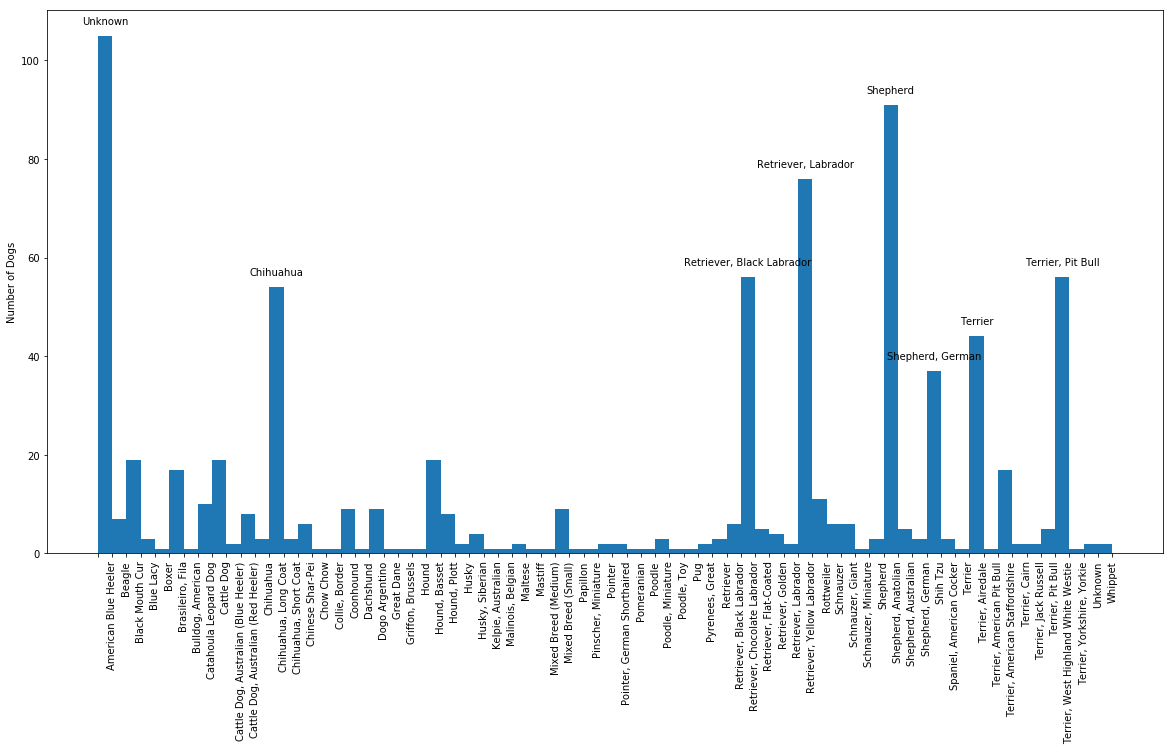

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from pylab import rcParams
from scipy.stats import linregress

%matplotlib inline

rcParams['figure.figsize'] = (20, 10)

_, bins, _ = plt.hist(breed_list, bins=list(range(0, len(list(set(breed_list))))))
plt.xticks(rotation=90)

rects = plt.gca().patches
plt.draw()
labels = [x.get_text() for x in list(plt.gca().xaxis.get_ticklabels())]
labels[0] = 'Unknown'

plt.ylabel('Number of Dogs')
high_instance_dogs = []
for rect, label in zip(rects, labels):
    height = rect.get_height()
    if height>30:
        high_instance_dogs.append(label)
        plt.gca().text(rect.get_x() + rect.get_width() / 2, height + 2, label, ha='center', va='bottom')
plt.show()

<div class="alert alert-info">
<h3>Quick Question 2.1</h3><p>If you were given a distribution of dog breeds from the wider Austin Pets Alive! population, how would you compare to see if they had the same breed distribution as Parvo infected animals? If you are interested in this question, try simulating some data and perform this comparison to your simulated data.</p>
</div>

## 2.2 Medicine Analyses

Next, we can perform a quick examination of the data set to ask how much medicine is used and when it is used.

In [16]:
import numpy as np
import pandas as pd
import re

output_df_elements = []
for column in medicine_columns:
    try:
        # Get Sum
        medicine = np.array(data.groupby(['Dog A#'])[column].sum())
        # Get Title
        text_title = re.sub("[\(\[].*?[\)\]]", "", column).replace('SQ ONLY', '').replace('IV ONLY', '').replace('ORAL ONLY', '').replace('mL', '').strip()
        # Save to List
        output_df_elements.append([text_title, len(medicine), medicine.sum()])
    except:
        pass

medicine_summary_df = pd.DataFrame(columns=['Medication', 'Dogs Treated', 'Total Amount (mL)'], data=output_df_elements)
display_df(medicine_summary_df)

,Medication,Dogs Treated,Total Amount (mL)
0,Baytril,796,2133.560
1,Polyflex,796,2163.760
2,Metoclopromide,796,2301.460
3,Cerenia,796,1818.490
4,Cefazolin,796,1228.919
5,Hetastarch Rate /hr,796,78423.000
6,Oral Dextrose,796,510.500
7,Panacur,796,4394.000
8,Strongid,796,3.790
9,Marquis Paste,796,473.870


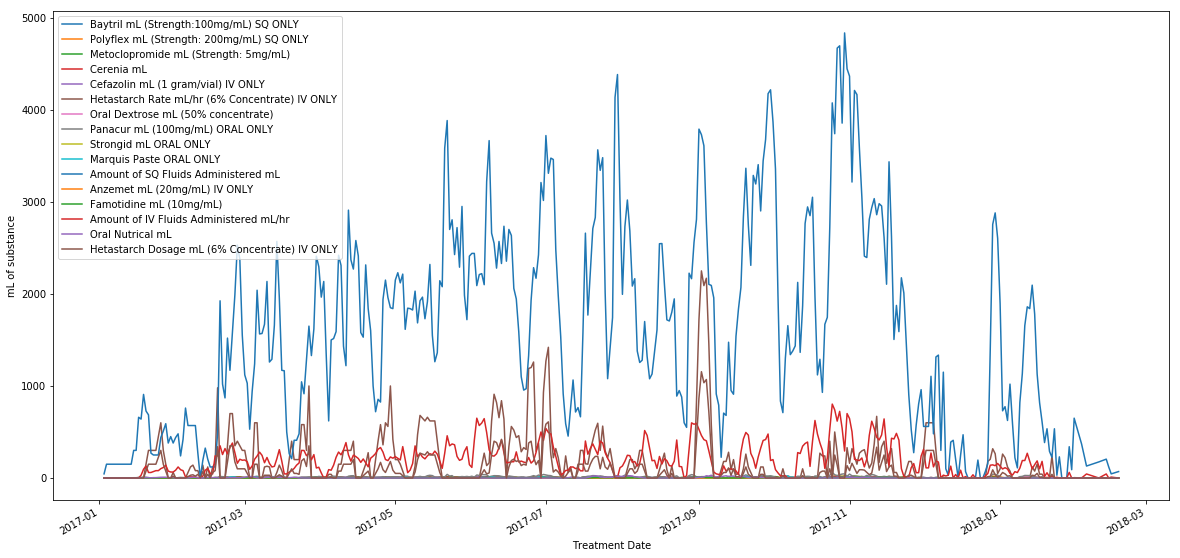

In [17]:
import matplotlib.pyplot as plt
from pylab import rcParams

%matplotlib inline

rcParams['figure.figsize'] = (20, 10)

data.groupby('Treatment Date')[medicine_columns].sum().fillna(0).plot()
plt.ylabel('mL of substance')
plt.show()

In [64]:
%matplotlib inline

rcParams['figure.figsize'] = (20, 10)

# data.groupby('Dog A#')[medicine_columns].fillna(0).plot()

#find the totally treatment of each dogs
cols = medicine_columns + ['Dog A#']
all_medicine_dosage_records = data[cols].fillna(0)

In [80]:
sum_medicine_dosage_records = all_medicine_dosage_records.groupby('Dog A#', as_index=False).sum()
sum_medicine_dosage_records

,Dog A#,Baytril mL (Strength:100mg/mL) SQ ONLY,Polyflex mL (Strength: 200mg/mL) SQ ONLY,Metoclopromide mL (Strength: 5mg/mL),Cefazolin mL (1 gram/vial) IV ONLY,Oral Dextrose mL (50% concentrate),Strongid mL ORAL ONLY,Oral Nutrical mL
0,43868,0.00,0.48,0.48,0.00,0.0,0.0,0.0
1,45896,3.08,6.16,6.16,0.00,0.0,0.0,0.0
2,45926,1.16,2.03,2.03,0.00,0.0,0.0,0.0
3,45927,1.76,3.52,3.52,0.00,0.0,0.0,0.0
4,45928,1.55,2.79,2.79,0.00,0.0,0.0,0.0
5,45929,1.04,2.08,2.08,0.00,0.0,0.0,0.0
6,45930,0.00,4.03,0.00,0.00,0.0,0.0,0.0
7,45931,0.00,4.76,0.00,0.00,0.0,0.0,0.0
8,45932,1.24,2.48,2.48,0.00,0.0,0.0,0.0
9,45933,0.00,3.64,0.00,0.00,0.0,0.0,0.0


We can also examine how much medicine is used, normalized by animal weight. These dosages are taken from the wiki.apaparvo.org documentation [Medical Charts](https://sites.google.com/site/apaparvowiki/home/procedures-protocols-and-checklists/medical-treatments/medical-charts).

In [ ]:
import matplotlib.pyplot as plt
from pylab import rcParams

%matplotlib inline

rcParams['figure.figsize'] = (20, 10)

data.groupby('Treatment Date')[medicine_columns].sum().multiply(medicine_costs).fillna(0).plot()
plt.ylabel('Cost (USD)')
plt.title('Cost Per Medication Over Time')
plt.show()

data.groupby('Treatment Date')[medicine_columns].sum().divide(medicine_dosages).fillna(0).plot()
plt.ylabel('Normalized Use')
plt.title('Medication Use Normalized by Dose')
plt.show()

One point of interest is the intercorrelation between the various medications being given. This begins to address the question of the degree to which different medications are given as part of the same treatment. One potential follow up might be to cluster these correlations to identify discrete treatment "regimes" that are used on different animals.

In [ ]:
tmp = np.transpose(np.array(data.groupby('Treatment Date')[medicine_columns].sum().divide(medicine_dosages).fillna(0)))

img = []
for i in range(0, len(tmp)):
    img.append([])
    for j in range(0, len(tmp)):
        val = np.correlate(tmp[i], tmp[j])[0]
        img[i].append(val)

ax = plt.gca()

im = plt.imshow(img)

ax.set_yticks(list(range(0, len(img))))
ax.set_xticks(list(range(0, len(img))))

ax.set_xticklabels(np.transpose(output_df_elements)[0], rotation=45)
ax.set_yticklabels(np.transpose(output_df_elements)[0])

plt.show()

<div class="alert alert-info">
<h3>Quick Question 2.2</h3><p>Do the administrations of different drugs correlate in any particular groupings? How would you determine what, if any, groupings exist within the drug administration? If these clusters exist, would you expect them to be good predictors of outcome? If so, why?</p>
</div>

We can visualize this inter-medicine correlation using just two commonly given medications to see how much they correlate, visually.

In [ ]:
import matplotlib.pyplot as plt
from pylab import rcParams

%matplotlib inline

rcParams['figure.figsize'] = (20, 10)

cols = [1, 2]

data.groupby('Treatment Date')[np.array(medicine_columns)[cols]].sum().divide(np.array(medicine_dosages)[cols]).fillna(0).plot()
plt.ylabel('Normalized Use')
plt.title('Medication Use Normalized by Dose')
plt.show()

plt.plot(tmp[cols[0]] - tmp[cols[1]])
plt.show()

Finally, it is interesting to observe the total cost per medication as certain medications only increase the comfort level of the animal but may not actually improve survival rates. For newer shelters with fewer resources, for instance, it may not be appropriate to give Cerenia, as the costs are very high for that medication.

In [ ]:
import seaborn as sb
medicine_summary_df = pd.DataFrame(columns=['Medication', 'Dogs Treated', 'Total Amount (mL)'], data=output_df_elements)
medicine_summary_df['Cost per mL'] = medicine_costs
medicine_summary_df['Cost (USD)'] = medicine_summary_df['Total Amount (mL)'].multiply(medicine_costs)
medicine_summary_df = medicine_summary_df[medicine_summary_df['Medication'] != 'Amount of IV Fluids Administered /hr']
medicine_summary_df = medicine_summary_df[medicine_summary_df['Medication'] != 'Hetastarch Rate /hr']
display_df(medicine_summary_df)
sb.barplot(x='Medication', y='Cost (USD)', data=medicine_summary_df)
plt.xticks(rotation=45)
plt.show()

## 2.3 Cost Breakdown (Cost/Dog Estimates)

Now that we have some materials usage values, we can create a more accurate representation of the cost of treatment per dog.

In [ ]:
per_dog_costs_names = ['Syringes', 'Parvo Tests', 'Food', 'Cleaning Supplies']
per_dog_costs = [5, 12.5, 10, 1962/len(data.groupby('Dog A#'))]

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

dog_costs = data.groupby('Dog A#').sum()[medicine_columns].multiply(medicine_costs).sum(axis=1).add(sum(per_dog_costs))

plt.hist(dog_costs, bins=20, range=(0, 300))
plt.vlines(np.mean(dog_costs), [0], 350, color='g')
plt.text(np.mean(dog_costs)+10, 350, 'Mean={0:0.2f} USD'.format(np.mean(dog_costs)))

plt.xlabel('Cost (USD)')
plt.ylabel('Number of Animals')
plt.title('Cost Per Animal Histogram')

plt.show()

In [ ]:
outliers = dog_costs>350

data.groupby('Dog A#').sum()[outliers]
data['Attitude'].value_counts()

### 2.3.1 Predicting Cost Per Dog

The majority of cost for each dog is tied to medication usage. The largest contributing medication is Cerenia, but regardless of which medications were used, the largest single predictor of cost should be Weight. This is because dosages are determined by weight. Even if a small dog needs several Cerenia dosages, this is likely to be overshadowed by the sheer volume of medicine needed by larger dogs (even if they are otherwise not as severe).

In [ ]:
import seaborn as sns
import scipy.stats as stats

weights = outcomes_data[['Dog A#', 'Intake Weight (lbs)', 'Age at Intake (Weeks)']]
weights = weights.set_index('Dog A#')
costs = pd.DataFrame(dog_costs, columns=['Cost'])
weight_v_cost = costs.join(weights, how='right')

def r2(x, y):
    return stats.pearsonr(x, y)[0] ** 2

Y=np.array(weight_v_cost['Cost'])
X=np.array(weight_v_cost['Intake Weight (lbs)'])
idxs = np.logical_not(np.isnan(Y))
Y=Y[idxs]
X=X[idxs]
idxs = np.logical_not(np.isnan(X))
Y=Y[idxs]
X=X[idxs]

print('Intake Weight vs. Cost - slope={0:0.2f}, intercept={1:0.2f}, r={2:0.2f}, p={3:0.2f}'.format(*stats.linregress(X, Y)))
print('Note: Per Dog Costs Start at {0}'.format(sum(per_dog_costs)))
sns.jointplot(x='Intake Weight (lbs)', y='Cost', data=weight_v_cost, kind="reg", stat_func=r2)

plt.show()

sns.jointplot(x='Intake Weight (lbs)', y='Age at Intake (Weeks)', data=weight_v_cost, kind="reg", stat_func=r2)

plt.show()

Note that our first model shows this to be the case, with cost and weight being more highly associated than even age and weight. 

<div class="alert alert-info">
<h3>Quick Question 2.3.1</h3><p>How would you determine what other variables in the data set best predict the cost to treat an animal? Use the first treatment for each animal to try to create a regression model for cost of treatment for each animal. Can you do better than just the animal's weight?</p>
</div>

### 2.3.2 Stratefied Cost Analysis

Veterinarians will explain that they treat dogs as grouped according to medication route. It takes time from an expert volunteer or vet to place an IV catheter in an animal, so it is only done when the animal is more severe. Similarly, a dog is only put on subcutaneous medications when they are fairly certain to have contracted Parvo. These different treatment groups can be examined independently to determine if there are cost differences associated with the Veterainarian's groupings.

In [ ]:
data['Type of Fluids Administered'].value_counts()
route = []
for val in data['Type of Fluids Administered']:
    val = str(val)
    if 'IV' in val or 'CRI' in val:
        route.append('IV')
    elif 'SQ' in val:
        route.append('SQ')
    else:
        route.append('None')
data['Dominant Route'] = route    

In [ ]:
data['Dominant Route'].value_counts()

In [ ]:
dog_costs = data.groupby(['Dominant Route', 'Dog A#']).sum()[medicine_columns].multiply(medicine_costs).sum(axis=1).add(sum(per_dog_costs))
means = np.array(dog_costs.groupby('Dominant Route').mean())
stds = np.array(dog_costs.groupby('Dominant Route').std())
ns = np.array(dog_costs.groupby('Dominant Route').count())
stes = [s/np.sqrt(n) for s, n in zip(stds, ns)] # You can use this instead of stds for visualization
labels = np.array(dog_costs.groupby('Dominant Route').mean().index)
fig, ax = plt.subplots()
rects1 = ax.bar(list(range(0, len(means))), means, 0.5, yerr=stds)

plt.xticks(list(range(0, len(means))), labels)
plt.ylabel('Average Cost Per Dog (USD)')
plt.title('Cost Per Dog Based on Medication Route')

plt.show()

Interestingly, although animals that are neither SQ nor IV cost less, the animals that are on SQ or IV appear to have little difference in cost. This came as a big surprise to the Veterinarians as they normally think of IV dogs as much more expensive. We can examine the per-medicine cost breakdown to attempt to find an explanation for this. 

<div class="alert alert-info">
<h3>Quick Question 2.3.2</h3><p>What other explanations can you think of for the IV and SQ treated animals having similar costs? What other follow-up analyses would you perform to compare these stratifications?</p>
</div>

In [ ]:
minimal_medicine_column_names = list(np.array(medicine_columns)[[0, 1, 2, 3, 4, 10, 13, 15]])
minimal_medicine_costs = list(np.array(medicine_costs)[[0, 1, 2, 3, 4, 10, 13, 15]])

In [ ]:
import matplotlib
rcParams['figure.figsize'] = (20, 10)
dog_costs = data.groupby(['Dominant Route', 'Dog A#']).sum()[minimal_medicine_column_names].multiply(minimal_medicine_costs)

means = np.array(dog_costs.groupby('Dominant Route').mean())

stds = np.array(dog_costs.groupby('Dominant Route').std())
ns = np.array(dog_costs.groupby('Dominant Route').count())
stes = [s/np.sqrt(n) for s, n in zip(stds, ns)]
labels = np.array(dog_costs.groupby('Dominant Route').mean().index)
fig, ax = plt.subplots()
rects1 = ax.bar(np.array(list(range(0, len(minimal_medicine_column_names))))+0.165, means[0], 0.33, yerr=stds[0], label='IV')
rects2 = ax.bar(np.array(list(range(0, len(minimal_medicine_column_names))))+0.33+0.165, means[1], 0.33, yerr=stds[1], label='None')
rects3 = ax.bar(np.array(list(range(0, len(minimal_medicine_column_names))))+0.66+0.165, means[2], 0.33, yerr=stds[2], label='SQ')

plt.xticks(np.array(list(range(0, len(minimal_medicine_column_names)))), [x.split('mL')[0] for x in minimal_medicine_column_names], rotation=30)
for label in ax.xaxis.get_majorticklabels():
    label.set_transform(label.get_transform() + matplotlib.transforms.ScaledTranslation(0.7, 0, fig.dpi_scale_trans))
plt.ylabel('Average Cost Per Dog (USD)')
plt.title('Cost Per Dog Based on Medication Route')
plt.grid()
plt.legend()
plt.show()


## 2.4 Volunteer Hours

One critical component of treatment cost is the volunteer hours. Note that the data set contains an "End of Shift Report Data" sheet which contains information reported by volunteers about their hours and the number of animals treated. Note that in addition to treating dogs in the ICU, volunteers also treat cats with feline panleukopenia. This may contribute to shift time similarly to dogs treatments and should also be examined here.

In [ ]:
import os
import pandas as pd

# Note: eosr stands for End of Shift Report
eosr_data = pd.read_excel(os.path.join(data_directory, data_filename), sheet_name='End of Shift Report Data')
eosr_data['Count of Staff/Volunteers'] = [len(str(x).split(',')) for x in eosr_data['Shift Staff/Volunteers']]

In [ ]:
average_volunteer_time_per_dog = eosr_data['Shift Time in Hours'].multiply(eosr_data['Count of Staff/Volunteers']).sum()/len(data.groupby('Dog A#'))

print('{0:0.2f} hours per dog average.'.format(average_volunteer_time_per_dog))

In [ ]:
import matplotlib.pyplot as plt
from scipy import stats

num_dogs_per_shift = eosr_data['Dogs in ICU']
num_kittens_per_shift = eosr_data['Kittens  in ICU']
hours_per_shift = eosr_data['Shift Time in Hours'].multiply(eosr_data['Count of Staff/Volunteers'])

print('Dogs Only - slope={0:0.2f}, intercept={1:0.2f}, r={2:0.2f}, p={3:0.2f}'.format(*stats.linregress(num_dogs_per_shift, hours_per_shift)))
print('Cats Only - slope={0:0.2f}, intercept={1:0.2f}, r={2:0.2f}, p={3:0.2f}'.format(*stats.linregress(num_kittens_per_shift, hours_per_shift)))
print('Dogs + Cats - slope={0:0.2f}, intercept={1:0.2f}, r={2:0.2f}, p={3:0.2f}'.format(*stats.linregress(num_dogs_per_shift+num_kittens_per_shift, hours_per_shift)))

(m, b, r, p, e) = stats.linregress(num_dogs_per_shift+num_kittens_per_shift, hours_per_shift)
plt.plot([[m*x+b] for x in range(0, 60)], c='r')
plt.scatter(np.array(num_dogs_per_shift) + np.array(num_kittens_per_shift), np.array(hours_per_shift))

plt.xlabel('Animals Per Shift')
plt.ylabel('Shift Time in Volunteer Man-Hours')
plt.title('Shift Time vs. Population')

plt.text(0, 25, 'r={0:0.2f}'.format(r))

plt.show()

Note that Dogs+Cats is the best predictive model (highest r value) and suggests that shifts generally take just under 3 hours of volunteer time regardless of the number of animals, with an increase of approximately 6.6 minutes per animal added. This assumes a linear increase. If we try a similar procedure with a log increase, we find that it works slightly better than a linear increase, suggesting some manner of optimization may be successfully performed as the number of animals increases, though this effect may be minimal.

In [ ]:
import scipy

f = lambda x,a,b,c: a*np.log2(c+x)+b

params, other = scipy.optimize.curve_fit(f, num_dogs_per_shift+num_kittens_per_shift, hours_per_shift, p0=(1,1,1))

y = [f(float(t), params[0], params[1], params[2]) for t in list(range(0, 60))]

ypred = [f(float(t), params[0], params[1], params[2]) for t in num_dogs_per_shift+num_kittens_per_shift]
ss_res = np.sum((hours_per_shift-ypred)**2)
ss_tot = np.sum((hours_per_shift-np.mean(hours_per_shift))**2)
r = np.sqrt(1-(ss_res/ss_tot))
print('r={0}'.format(r))

plt.plot(list(range(0, 60)), y, color='r')
plt.scatter(np.array(num_dogs_per_shift) + np.array(num_kittens_per_shift), np.array(hours_per_shift))

plt.xlabel('Animals Per Shift')
plt.ylabel('Shift Time in Volunteer Man-Hours')
plt.title('Shift Time vs. Population')
plt.text(0, 25, 'r={0:0.2f}'.format(r))
plt.show()

In [ ]:
import seaborn as sb

sb.distplot(hours_per_shift)
plt.xlabel('Volunteer Man-Hours')
plt.ylabel('Proportion of Shifts')
plt.title('Proportion of Shifts Taking Volunteer Man-Hours')
plt.show()

We may also be interested in how well the manager optimized the number of volunteers given the expected number of animals in order to keep the average per-volunteer shift time within an expected region (it is advertised to be ~2 hours per shift).

<div class="alert alert-info">
<h3>Quick Question 2.4</h3><p>How well did the manager do in keeping the shift to the prescribed, 2 hour duration? How could the manager behave differently in order to achieve this goal with higher precision?</p>
</div>

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import colors
from mpl_toolkits.mplot3d import Axes3D

columns = ['Dogs in ICU', 'Shift Time in Hours', 'Count of Staff/Volunteers']

xs, ys, zs = [np.array(eosr_data[c]) for c in columns]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

cmap = colors.ListedColormap(['k','b','g','y','r'])
bounds=list(sorted(set(zs)))
norm = colors.BoundaryNorm(bounds, cmap.N)

ax.scatter(xs, ys, zs, c=zs, cmap=cmap)

ax.set_xlabel(columns[0])
ax.set_ylabel(columns[1])
ax.set_zlabel(columns[2])

plt.show()

# 3. Severity Analysis

One of the more challenging, yet critical, analyses is determining an index of the condition severity of the animals. This allows prediction and detailed analysis of how treatment progresses and what populations should be targeted for special intervention (and when).

## 3.1 Attitude Visualized

We can visualize the attitude changes as they lead to our two outcomes. Attitude is one of the simplest measures in the data which should relate to severity.

In [ ]:
import matplotlib.pyplot as plt
from scipy.interpolate import spline
%matplotlib inline

interpolate = False

# Clear NaN values and interpolate of requested
for l in attitude_sublists:
    # Remove NaNs
    vals = np.array([x for x in l if str(x) != 'nan'])
    if interpolate:
        if len(vals) > 2:
            # Generate the interpolated line
            T = np.array(list(range(0, len(vals))))
            xnew = np.linspace(T.min(),T.max(),50)
            vals_smooth = spline(T,vals,xnew)
            # Plot the interpolated line
            plt.plot(xnew, vals_smooth, alpha=0.01, c='b')
    else:
        # Plot the raw line
        plt.plot(vals, alpha=0.01, c='b')

# Plot the mean line
plt.plot(np.nanmean(attitude_sublists, axis=0), c='r')

# Redo the y scale ticks
plt.yticks(np.arange(0, 6, 1))
labels = [item.get_text() for item in plt.gca().get_yticklabels()]
labels[0:6] = ['Discharged', 'BAR', 'QAR', 'Leth', 'Coma', 'Deceased']
plt.gca().set_yticklabels(labels)

# Redo the x scale ticks
plt.xticks(np.arange(0, 30, step=2), [int(x) for x in np.arange(0, 30, step=2)/2])

# Label the plot
plt.xlabel('Days in ICU')
plt.ylabel('Severity of Condition')
plt.title('Average Severity of Animals in ICU')
plt.xlim(0, 30)
plt.show()

## 3.2 Duration of Treatment

Since we've already broken the data down into different treatment durations, we can plot this as a histogram to get a sense of how long dogs stay in the ICU.

In [ ]:
plt.hist([len(a) for a in jagged_attitude_sublists])
plt.axvline(x=24, c='r')
plt.title('Duration of Stay (in # Treatments)')
plt.xlabel('Number of Treatments')
plt.ylabel('Number of Dogs')
plt.show()

### 3.2.1 Long Stay Dogs

Next, we'll enumerate the long stay (more than 2 weeks) animals, as this was a request by the shelter to determine factors which may have contributed to longer stays. Note that, in this data set, one critical factor was an influx of dogs due to hurricane Harvey.

In [ ]:
import numpy as np
import pandas as pd

number_of_treatments = 0#originally it is 28 !!!

long_stay_dogs = [np.int64(x) for x in name_key[[len(a) > number_of_treatments for a in jagged_attitude_sublists]]]

data_long_stay_dogs = outcomes_data[outcomes_data['Dog A#'].isin(long_stay_dogs)]

# print(display_df(data_long_stay_dogs))
print(len(data_long_stay_dogs))

In [ ]:
data_long_stay_dogs['Deceased'].value_counts()

<div class="alert alert-info">
<h3>Quick Question 3.2</h3><p>How would you go about predicting which dogs are likely to be long stay dogs? What variables would you use in this model? Create this model if these questions interest you.</p>
</div>

In [ ]:
#find the survial of all long stay dogs
# data_long_stay_dogs['Primary Breed'].value_counts()
data_long_stay_dogs['Deceased'] = data_long_stay_dogs['Deceased'].replace(['No', 'Yes'], [0, 1])
type(data_long_stay_dogs)
pd.DataFrame.pivot_table(data_long_stay_dogs, values='Deceased', index=['Primary Breed'], columns=['Sex'], aggfunc=np.sum)

In [ ]:
data_long_stay_dogs

## 3.3 Exploring Outcome

Now that we've done some basic examination, we can look at how outcome relates to variables of interest. Specifically, we'll start by looking at weight and duration of stay in the ICU. We can see that there's a critical region between 1 and 5 days where animals are at greatest risk of dieing (though this is skewed by the fact that animals are rarely discharged during this period).

### 3.3.1 Visualization Variables

We'll pre-generate a few variables for the outcome data for convenience.

In [ ]:
# Calculate the total number of days
days = np.array([len(x) for x in jagged_attitude_sublists])/2.0
# Animal outcome colors
colors = [x[0] for x in pd.DataFrame(outcome_list).replace([0, 5, np.nan], ['b', 'r', 'g']).values]
# Animal outcome labels
labels = [x[0] for x in pd.DataFrame(outcome_list).replace([0, 5, np.nan], ['Discharged', 'Deceased', 'Unknown']).values]

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from pylab import rcParams
from scipy.stats import linregress

%matplotlib inline

x, y = days[outcome_list == 0.], weight_list[outcome_list == 0.]
plt.scatter(x, y, c='b', label='Discharged', alpha=0.25)
mask = ~np.isnan(x) & ~np.isnan(y)
m, b, r, p, stderr = linregress(x[mask], y[mask])
plt.plot(x, b + m*x, 'b:', label='Discharged Fit (p={0:.2f}, r={1:.2f})'.format(p, r))

x, y = days[outcome_list == 1.], weight_list[outcome_list == 1.]
plt.scatter(x, y, c='r', label='Deceased', alpha=0.25)
mask = ~np.isnan(x) & ~np.isnan(y)
m, b, r, p, stderr = linregress(x[mask], y[mask])
plt.plot(x, b + m*x, 'r:', label='Deceased Fit (p={0:.2f}, r={1:.2f})'.format(p, r))

plt.xlabel('Day in ICU')
plt.ylabel('Intake Weight (lbs)')
plt.title('Relationship Between Weight and Days in ICU')
plt.xlim(0, 14)

plt.legend()
plt.show()

<div class="alert alert-info">
<h3>Quick Question 3.3</h3><p>Why might there be a large gap in the animals that survived being discharged between days 1 and 5? How would you go about predicting which animal will/won't survive? Make this predictive model if these questions interest you.</p>
</div>

## A Better Severity Score

Now that we've explored a few basic features of the data set, we can do a more thorough examination of severity by using all external evaluations of severity. These severity metrics are all ordinal, and they must be converted to a scalar so we can generate a score from them. We'll also populate a binary outcome list so we can try to form predictions. Ultimately, severity can only be easily defined based on outcome, so dogs can, abstractly, be thought of being more severe the closer to death they are.

In [ ]:
import numpy as np

# Remove the nan rows
data = data[~np.isnan(data['outcome'])]
for metric in severity_metrics:
    data = data[~np.isnan(data[metric])]
    
display_df(data[severity_metrics].head(5))

<div class="alert alert-info">
<h3>Quick Question</h3><p>How would you evaluate severity of an animal given the information you now know? Would that severity score properly indicate a dog's probability of dieing given only their first treatment observation? If not, why not?</p>
</div>

# Save Data

For convnience, we can save the, now parsed, data into pickled dataframes which can be loaded from other files. This way we don't have to redo any of the processing performed in this document which impacted the data frame.

In [69]:
import pickle as pkl

In [ ]:

with open('data.pkl', 'wb') as f:
    pkl.dump(data, f)
with open('outcomes.pkl', 'wb') as f:
    pkl.dump(outcomes_data, f)


In [81]:
with open('sum_medicine_dosage.pkl', 'wb') as f:
    pkl.dump(sum_medicine_dosage_records, f)

In [75]:
sum_medicine_dosage_records

Index(['Baytril mL (Strength:100mg/mL) SQ ONLY',
       'Polyflex mL (Strength: 200mg/mL) SQ ONLY',
       'Metoclopromide mL (Strength: 5mg/mL)',
       'Cefazolin mL (1 gram/vial) IV ONLY',
       'Oral Dextrose mL (50% concentrate)', 'Strongid mL ORAL ONLY',
       'Oral Nutrical mL'],
      dtype='object')


"TimeInParvoICU": "3.19:34:52"